# Inference

Kali ini kita dapat mencoba langsung model yang telah dilatih sebelumnya. User hanya perlu melakukan input jumlah gambar yang diprediksi, dan sistem akan memilih dari data prediksi yang tersedia

## Import libary

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import keras
from keras.layers import TFSMLayer

## Konstanta

In [11]:
DATASET_PATH = "data/seg_pred/seg_pred/"

MODEL_PATH = "saved_model" 

LABELS = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

## Def functions

In [12]:
tf.saved_model.load(
    MODEL_PATH, tags=None, options=None
)


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7bf21d8ebfd0>

In [23]:
import tensorflow as tf

loaded = tf.saved_model.load("saved_model")
print(list(loaded.signatures.keys()))


['serve', 'serving_default']


In [ ]:
# model = TFSMLayer("saved_model", call_endpoint="serving_default")


In [44]:
def load_model(model_path):
    """
    Memuat model SavedModel sebagai inference layer (Keras 3)
    """
    print("Memuat model...")
    model = TFSMLayer(model_path, call_endpoint='serving_default')
    print("Model berhasil dimuat!")
    return model

    

def preprocess_image(image_path):
    """
    Memproses gambar untuk input model
    """
    image = Image.open(image_path)
    image = image.resize((150, 150))
    image_array = np.array(image) / 255.0  
    return image_array


def predict_image(model, image_array):
    """
    Melakukan prediksi pada gambar
    """
    output = model(np.expand_dims(image_array, axis=0))
    prediction = list(output.values())[0].numpy()
    
    predicted_class = np.argmax(prediction[0])
    confidence = prediction[0][predicted_class]
    
    return predicted_class, confidence



def get_random_images(folder_path, num_images=5):
    """
    Memilih gambar secara acak dari folder
    """
    all_images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    if num_images > len(all_images):
        print(f"Hanya terdapat {len(all_images)} gambar di folder.")
        num_images = len(all_images)
    
    selected_images = random.sample(all_images, num_images)
    return selected_images

## Main function

In [46]:
def main():
    try:
        model = load_model(MODEL_PATH)
        print("Model berhasil dimuat!")
    except Exception as e:
        print(f"Error saat memuat model: {e}")
        return

    while True:
        try:
            # Input jumlah gambar
            num_images = int(input("\nMasukkan jumlah gambar yang ingin diprediksi (maks 7301, 0 untuk keluar): "))
            
            if num_images == 0:
                print("Program selesai.")
                break
                
            if num_images < 0 or num_images > 7301:
                print("Jumlah gambar harus antara 1-7301.")
                continue
                
            # Pilih gambar secara acak
            selected_images = get_random_images(DATASET_PATH, num_images)
            
            # Plot gambar dan prediksi
            fig = plt.figure(figsize=(15, 12))
            columns = 3
            rows = (num_images + 2) // 3  
            
            for i, img_name in enumerate(selected_images):
                img_path = os.path.join(DATASET_PATH, img_name)
                img_array = preprocess_image(img_path)

                # Prediksi gambar
                output = model(np.expand_dims(img_array, axis=0))  # dict
                prediction = list(output.values())[0].numpy()  # ambil isi tensor dari dict
                pred_class = np.argmax(prediction[0])
                confidence = prediction[0][pred_class]
                pred_label = LABELS[pred_class]
                
                # Tampilkan hasil
                ax = fig.add_subplot(rows, columns, i+1)
                ax.set_title(f"Prediksi: {pred_label} ({confidence:.2f})")
                plt.imshow(Image.open(img_path))
                plt.axis('off')
            
            plt.tight_layout()
            plt.show()
            
        except ValueError:
            print("Masukkan angka yang valid.")
        except Exception as e:
            print(f"Error: {e}")


Memuat model...
Model berhasil dimuat!
Model berhasil dimuat!


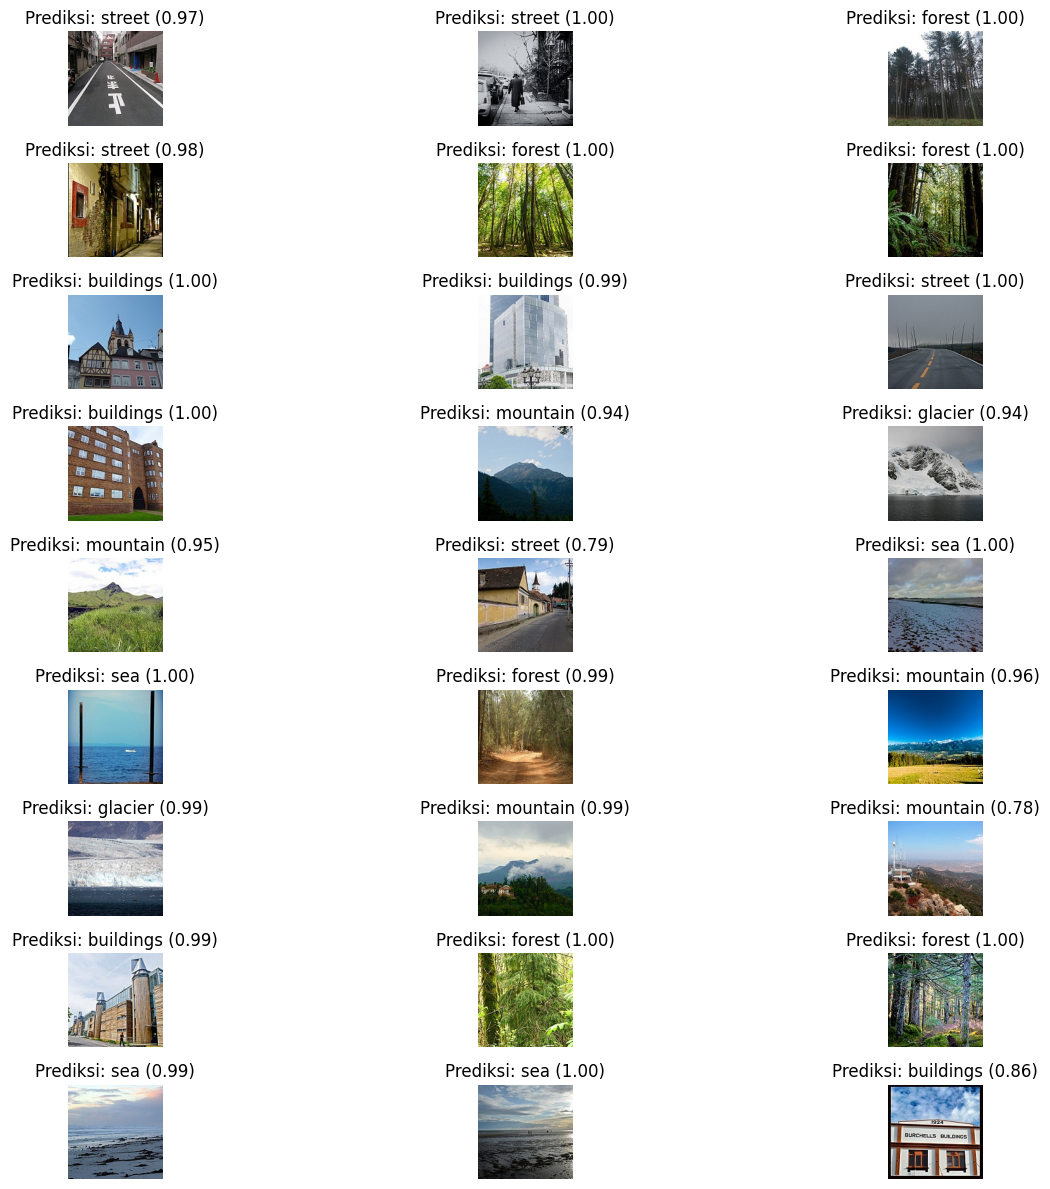

Program selesai.


In [48]:
if __name__ == "__main__":
    main()